Задание
взять данные из https://www.kaggle.com/datasets/mrapplexz/bashim-quotes
обучить модель GPT для генерации своих цитат

взять новостные данные из https://github.com/natasha/corus
load_lenta2
нам понадобиться сам текст и заголовок
обучить модель T5/ или GPT для генерации заголовков для статей

In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

1 Взять данные из
https://www.kaggle.com/datasets/mrapplexz/bashim-quotes

In [2]:
from google.colab import files

upload = files.upload()

Saving dataset.jsonl to dataset.jsonl


In [3]:
!ls -la

total 39600
drwxr-xr-x 1 root root     4096 Dec 26 07:44 .
drwxr-xr-x 1 root root     4096 Dec 26 07:31 ..
drwxr-xr-x 4 root root     4096 Dec 20 20:18 .config
-rw-r--r-- 1 root root 40531099 Dec 26 07:44 dataset.jsonl
drwxr-xr-x 1 root root     4096 Dec 20 20:19 sample_data


In [4]:
!mkdir data

In [5]:
!mv 'dataset.jsonl' 'data/dataset.jsonl'

In [6]:
DATASET_PATH = 'data/dataset.jsonl'

with open(DATASET_PATH) as f:
    df = pd.read_json(DATASET_PATH, lines=True).set_index('id')

In [7]:
print(df.dtypes)

date      datetime64[ns, UTC]
rating                float64
text                   object
dtype: object


In [8]:
df.head()

,date,rating,text
id,,,
1,2004-08-30 11:24:00+00:00,22010.0,"<Ares> ppdv, все юниксы очень дружелюбны.. они..."
2,2004-08-30 11:25:00+00:00,25105.0,<томатик_рад> а ты не чувствуешь красоту мира?...
3,2004-08-30 11:27:00+00:00,7192.0,"<Дор> ""мышка, почему у тебя такие большие глаз..."
4,2004-08-30 11:28:00+00:00,29169.0,"<PPDV[os2]> ""Мальчики, вы что больные, бегать ..."
5,2004-08-30 11:26:00+00:00,7140.0,<Ohtori_Akio> мы - как разработчики - живём с ...


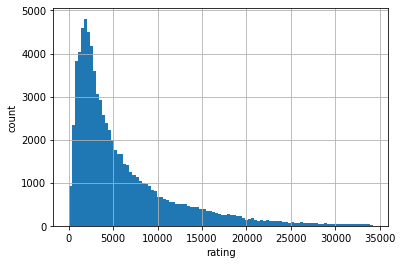

In [9]:
rating = df.rating.dropna()
quantile = rating.quantile(.99)
rating.hist(bins=100, range=(rating.min(), quantile))
plt.xlabel('rating')
plt.ylabel('count')
plt.show()

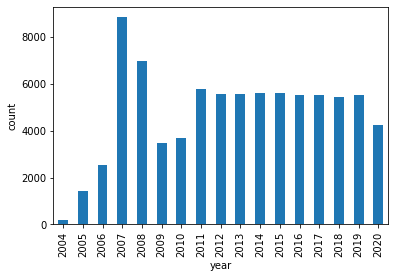

In [10]:
by_year = df.groupby(df.date.dt.year)['text'].count()
by_year.plot.bar()
plt.xlabel('year')
plt.ylabel('count')
plt.show()

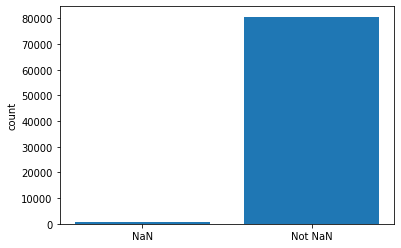

In [11]:
nans = df.rating.isna().sum()
not_nans = len(df) - nans


bars = [nans, not_nans]
y_pos = np.arange(len(bars))
plt.bar(y_pos, bars)
plt.xticks(y_pos, ('NaN', 'Not NaN'))
plt.ylabel('count')
plt.show()

In [12]:
pd.set_option('display.max_colwidth', 150)

In [13]:
df['text'][2]

'<томатик_рад> а ты не чувствуешь красоту мира?\n<fox> честно говоря, я сейчас чувствую только отсутствие http.\n<томатик_рад> не туда смотришь, глянь вокруг!\n<fox> как я гляну, если http не работает? :/'

In [14]:
!wget https://gist.githubusercontent.com/avidale/d3da0ded85a4a16db6eb84d8331638ce/raw/a188084e5ef37b43b01fef0534b55c865b9a569e/tweets.txt


--2022-12-26 07:44:26--  https://gist.githubusercontent.com/avidale/d3da0ded85a4a16db6eb84d8331638ce/raw/a188084e5ef37b43b01fef0534b55c865b9a569e/tweets.txt
Resolving gist.githubusercontent.com (gist.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to gist.githubusercontent.com (gist.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4659 (4.5K) [text/plain]
Saving to: ‘tweets.txt’

tweets.txt          100%[===================>]   4.55K  --.-KB/s    in 0s      

2022-12-26 07:44:27 (65.7 MB/s) - ‘tweets.txt’ saved [4659/4659]



In [15]:
!ls

data  sample_data  tweets.txt


In [16]:
# Закачиваем сохранённые твиты
with open('tweets.txt', 'r') as f:
    tweets = f.read().strip().split('\n\n')
print(len(tweets))
for i in range(3):
    print(tweets[i])

26
Соловьев наконец-то вышел на новый уровень - теперь его стали банить и в офлайне
Дарим мы тебе бутылку игристого вина. Пить тебе еще рано, но встретиться с ней за некоторые преступления ты уже можешь. ПОЗ-ДРАВ-ЛЯ-ЕМ!
Да. Еще очень многие помнят, что такое госплан, как планировалось, талоны на еду, очереди, дефицит, выездные визы. Но спасибо, что напомнил


In [17]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.8 MB 28.3 MB/s 
     |████████████████████████████████| 182 kB 67.2 MB/s 
     |████████████████████████████████| 7.6 MB 35.5 MB/s 


In [18]:
import torch
device = torch.device("cuda")

In [19]:
from transformers import AutoTokenizer, AutoModelForCausalLM

In [20]:
# Загружаем large GPT3, которая основана на GPT2
model_name = 'sberbank-ai/rugpt3large_based_on_gpt2'
#model_name = 'Grossmend/rudialogpt3_medium_based_on_gpt2'
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForCausalLM.from_pretrained(model_name).to(device)

Downloading:   0%|          | 0.00/609 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.71M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.27M [00:00<?, ?B/s]

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


Downloading:   0%|          | 0.00/3.14G [00:00<?, ?B/s]

In [21]:
import random

In [22]:
# Мы хотим, чтобы GPT выводила суть, что после 3-х звёздочек ('***')
#  нужно генерировать какой то осмысленный текст похожий на твит.
# 
# Пишем рэндомное сэмплирование 5 твитов (берём 5 твитов из 26 случайным обазом)

sep = '\n***\n'  # Признак того, что твит закончился и нужногенерировать ещё один твит
# sep = '\n27479153	Sandy_mustache	2021-02-18 16:44:00	'


# Так как мы постоянно сэмплируем разные твиты,
# мы будем постоянно получать разное распределение
prefix = sep.join([''] + random.sample(tweets, k=5) + [''])

tokens = tokenizer(prefix, return_tensors='pt')
tokens = {k: v.to(model.device) for k, v in tokens.items()}
end_token_id = tokenizer.encode('***')[0]  # '***' - токен который будет оканчивать твит

# выводим то, что мы передаём на вход
print(prefix)


***
Квартир ветеранам и достойную пенсию никто не гарантирует, но зато парад будет однозначно
***
Прокурор Фролова просит признать Навального виновным по делу о клевете на ветерана и назначить ему наказание в виде штрафа 950 тысяч рублей.
Также с учетом имеющихся судимостей прокурор просит назначить Навальному наказание в виде 3 лет и 6 месяцев лишения свободы.
***
Есть подозрение, что те самые 400 кг порошка хранятся в кабинете Володина под его чутким контролем. Иначе эти фантазии не объяснить
***
Ну всё. Теперь придется господствовать
***
Соловьев наконец-то вышел на новый уровень - теперь его стали банить и в офлайне
***



In [23]:
# Генерируем какой то осмысленный текст похожий на твит.

size = tokens['input_ids'].shape[1]
output = model.generate(
    **tokens, 
    #end_token=end_token_id,
    do_sample=False,  # вкл/выкл режим выдачи нескольких вариантов д.б. ещё один параметр
    max_length=size+128, 
    # max_length=size+64,
    repetition_penalty=4.2,  # штраф за повторы одинарных токенов
    temperature=0.7,  # температура
    num_beams=10,  # Строим дерево глубины 10
    # no_repeat_ngram_size=3  # ! тройки подряд идущих токенов не должны повторяться (3 и меньше токенов не должны повторяться)
)
decoded = tokenizer.decode(output[0])
result = decoded[len(prefix):]
print(result)

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Пресс-секретарь президента России Дмитрий Песков заявил, что Владимир Путин готов встретиться с оппозиционером Алексеем Навальным после того, как лидер партии РПР-Парнас Михаил Касьянов был приговорен к условному сроку за хищение средств компании "Ив Роше". Об этом сообщает РИА Новости со ссылкой на пресс-секретаря главы государства Дмитрия Пескова. По словам Пескова, у Путина нет никаких сомнений в том, что Алексей Навальный должен быть немедленно освобожден из-под домашнего ареста. При этом он отметил, что пока неизвестно, когда именно состоится эта встреча. Ранее стало известно, что Алексея Навального приговорили к условному сроку


In [25]:
# Генерируем какой то осмысленный текст похожий на твит.

size = tokens['input_ids'].shape[1]
output = model.generate(
    **tokens, 
    #end_token=end_token_id,
    do_sample=False, 
    max_length=size+128, 
    # max_length=size+64,
    repetition_penalty=4.2,   # штраф за повторы одинарных токенов
    temperature=1.3,  # температура
    num_beams=7,  # Строим дерево глубины 10
    no_repeat_ngram_size=5  # ! тройки подряд идущих токенов не должны повторяться (3 и меньше токенов не должны повторяться)
)
decoded = tokenizer.decode(output[0])
result = decoded[len(prefix):]
print(result)

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Пресс-секретарь президента России Дмитрий Песков заявил, что Владимир Путин готов встретиться с оппозиционером Алексеем Навальным после того, как тот извинился за свои слова во время предвыборной кампании. Об этом сообщает РИА «Новости» со ссылкой на пресс-секретаря главы государства Дмитрия Пескова.
«Он (Навальный — прим. "Ленты.ру") извиняется», — сказал Песков.
Ранее стало известно, что лидер партии РПР-Парнас Михаил Касьянов попросил прощения у Алексея Навального из-за своих высказываний во время предвыборной гонки. По словам политика, Навальный оскорбил его тем, что назвал


2 взять новостные данные из https://github.com/natasha/corus
load_lenta2
нам понадобиться сам текст и заголовок
обучить модель T5/ или GPT для генерации заголовков для статей

In [26]:
!pip install razdel networkx pymorphy2[fast] nltk rouge==0.3.1
!pip install --upgrade datasets tqdm transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 55 kB 3.6 MB/s 
     |████████████████████████████████| 8.2 MB 62.8 MB/s 
     |████████████████████████████████| 371 kB 58.2 MB/s 
  Created wheel for DAWG: filename=DAWG-0.8.0-cp38-cp38-linux_x86_64.whl size=930168 sha256=e1db9d2eea04271ad891e3c295615503f009e9930d70ec902e5decec90fad2a1
  Stored in directory: /root/.cache/pip/wheels/1c/e6/8f/313a7ccc57b29a7affb7205664277a1d5ebe73bf600a69a615
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13723 sha256=7cba658dcc560f679e02c67e07109617ade2c5515da5ec64a6f3c51b6cd87ffb
  Stored in directory: /root/.cache/pip/wheels/56/ea/58/ead137b087d9e326852a851351d1debf4ada529b6ac0ec4e8c
Successfully built DAWG docopt
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 452 kB 29.2 MB/s 
     |██████████

In [27]:
!ls

data  sample_data  tweets.txt


In [28]:
from datasets import load_dataset

dataset_train = load_dataset('IlyaGusev/gazeta', revision="v1.0", split= 'train[:10%]')
dataset_test = load_dataset('IlyaGusev/gazeta', revision="v1.0", split= 'test[:10%]')

Extracting data files:   0%|          | 0/3 [00:00<?, ?it/s]

Generating train split:   0%|          | 0/52400 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/5770 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/5265 [00:00<?, ? examples/s]

Dataset gazeta downloaded and prepared to /root/.cache/huggingface/datasets/IlyaGusev___gazeta/default/1.0.0/ef9349c3c0f3112ca4036520d76c4bc1b8a79d30bc29643c6cae5a094d44e457. Subsequent calls will reuse this data.


In [29]:
dataset_train

Dataset({
    features: ['text', 'summary', 'title', 'date', 'url'],
    num_rows: 5240
})

In [30]:
dataset_test

Dataset({
    features: ['text', 'summary', 'title', 'date', 'url'],
    num_rows: 577
})

In [31]:
dataset_test['summary'][0]

'В NASA назвали четыре миссии в дальний космос, которые в этом десятилетии могут быть запущены американцами. Среди них — две миссии по изучению Венеры, полет к спутнику Юпитера и экспедиция к Тритону, спутнику Нептуна.'

In [32]:
dataset_test['title'][0]

'Венера, Ио или Тритон: куда полетит NASA'

In [33]:
model_name = "IlyaGusev/rut5_base_sum_gazeta"

In [34]:
def len_tok(text):
    return len(text.split())

In [35]:
max_len_sum, max_len_tl = max(map(len_tok, dataset_train['summary'])), max(map(len_tok, dataset_train['title']))
max_len_sum, max_len_tl

(75, 18)

In [36]:
max_len_sum, max_len_tl = 60, 15

In [37]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained(model_name)

def tokenize(batch):
    tokenized_input = tokenizer(batch['summary'], padding='max_length', truncation=True, max_length=max_len_sum)
    tokenized_label = tokenizer(batch['title'], padding='max_length', truncation=True, max_length=max_len_tl)

    tokenized_input['labels'] = tokenized_label['input_ids']

    return tokenized_input

dataset_train = dataset_train.map(tokenize, batched=True, batch_size=8)
dataset_test = dataset_test.map(tokenize, batched=True, batch_size=8)

dataset_train.set_format('numpy', columns=['input_ids', 'attention_mask', 'labels'])
dataset_test.set_format('numpy', columns=['input_ids', 'attention_mask', 'labels'])

Downloading:   0%|          | 0.00/279 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/828k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.31M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/65.0 [00:00<?, ?B/s]

  0%|          | 0/655 [00:00<?, ?ba/s]

  0%|          | 0/73 [00:00<?, ?ba/s]

In [38]:
dataset_train.save_to_disk('gazeta/train')
dataset_test.save_to_disk('gazeta/test')

Saving the dataset (0/1 shards):   0%|          | 0/5240 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/577 [00:00<?, ? examples/s]

In [39]:
!ls

data  gazeta  sample_data  tweets.txt


In [40]:
from transformers import T5ForConditionalGeneration, Trainer, TrainingArguments


model = T5ForConditionalGeneration.from_pretrained(model_name)

Downloading:   0%|          | 0.00/766 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/977M [00:00<?, ?B/s]

In [41]:
output_dir = 'gazeta/output'

training_args = TrainingArguments(
    output_dir=output_dir,
    num_train_epochs=10,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    eval_accumulation_steps=1, # Number of eval steps to keep in GPU (the higher, the mor vRAM used)
    prediction_loss_only=True, # If I need co compute only loss and not other metrics, setting this to true will use less RAM
    learning_rate=0.00001,
    evaluation_strategy='steps', # Run evaluation every eval_steps
    save_steps=1000, # How often to save a checkpoint
    save_total_limit=1, # Number of maximum checkpoints to save
    remove_unused_columns=True, # Removes useless columns from the dataset
    run_name='run_gazeta', # Wandb run name
    logging_steps=500, # How often to log loss to wandb
    eval_steps=500, # How often to run evaluation on the val_set
    logging_first_step=False, # Whether to log also the very first training step to wandb
    load_best_model_at_end=True, # Whether to load the best model found at each evaluation.
    metric_for_best_model="loss", # Use loss to evaluate best model.
    greater_is_better=False # Best model is the one with the lowest loss, not highest.
)

In [42]:
%%time

# Обучение. У нас 10 эпох.
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=dataset_train,
    eval_dataset=dataset_test
)

trainer.train()

/usr/local/lib/python3.8/dist-packages/transformers/optimization.py:306: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
***** Running training *****
  Num examples = 5240
  Num Epochs = 10
  Instantaneous batch size per device = 8
  Total train batch size (w. parallel, distributed & accumulation) = 8
  Gradient Accumulation steps = 1
  Total optimization steps = 6550
  Number of trainable parameters = 244309248


Step,Training Loss,Validation Loss
500,8.065000,3.312230
1000,4.215400,3.119597
1500,2.929900,3.013309
2000,2.608300,2.925200
2500,2.510700,2.879660
3000,2.465100,2.861516
3500,2.422600,2.835413
4000,2.445200,2.819440
4500,2.391800,2.806690
5000,2.402400,2.794982


***** Running Evaluation *****
  Num examples = 577
  Batch size = 8
***** Running Evaluation *****
  Num examples = 577
  Batch size = 8
Saving model checkpoint to gazeta/output/checkpoint-1000
Configuration saved in gazeta/output/checkpoint-1000/config.json
Model weights saved in gazeta/output/checkpoint-1000/pytorch_model.bin
***** Running Evaluation *****
  Num examples = 577
  Batch size = 8
***** Running Evaluation *****
  Num examples = 577
  Batch size = 8
Saving model checkpoint to gazeta/output/checkpoint-2000
Configuration saved in gazeta/output/checkpoint-2000/config.json
Model weights saved in gazeta/output/checkpoint-2000/pytorch_model.bin
Deleting older checkpoint [gazeta/output/checkpoint-1000] due to args.save_total_limit
***** Running Evaluation *****
  Num examples = 577
  Batch size = 8
***** Running Evaluation *****
  Num examples = 577
  Batch size = 8
Saving model checkpoint to gazeta/output/checkpoint-3000
Configuration saved in gazeta/output/checkpoint-3000/con

CPU times: user 25min 46s, sys: 2min 32s, total: 28min 19s
Wall time: 29min 20s


TrainOutput(global_step=6550, training_loss=3.0354668467281427, metrics={'train_runtime': 1760.0844, 'train_samples_per_second': 29.771, 'train_steps_per_second': 3.721, 'total_flos': 4174008606720000.0, 'train_loss': 3.0354668467281427, 'epoch': 10.0})

In [43]:
trainer.save_model(output_dir + '/model')

Saving model checkpoint to gazeta/output/model
Configuration saved in gazeta/output/model/config.json
Model weights saved in gazeta/output/model/pytorch_model.bin


In [44]:
INX = 100
print("SUMMARY: | {}".format(dataset_test['summary'][INX]))
print("TITLE: | {}".format(dataset_test['title'][INX]))

SUMMARY: | Российские фрегаты «Адмирал Макаров» и «Адмирал Григорович» с крылатыми ракетами «Калибр-НК» проходят через турецкие проливы Босфор и Дарданеллы в направлении Средиземного моря. Ранее эти корабли уже участвовали в военной операции РФ в Сирии и теперь направляются туда на фоне обострившейся ситуации в Идлибе.
TITLE: | Снова в Сирию: российские фрегаты идут в Средиземное море


In [45]:
device = "cuda"

In [46]:
import torch

input_text = dataset_test['summary'][INX]

with torch.no_grad():
    tokenized_text = tokenizer(input_text, truncation=True, padding=True, return_tensors='pt')

    source_ids = tokenized_text['input_ids'].to(device, dtype = torch.long)
    source_mask = tokenized_text['attention_mask'].to(device, dtype = torch.long)

    generated_ids = model.generate(
        input_ids = source_ids,
        attention_mask = source_mask, 
        max_length=512,
        num_beams=7,
        temperature = 1.3,  
        repetition_penalty=1, 
        length_penalty=1, 
        early_stopping=True,
        no_repeat_ngram_size=2  # количество повторов n-грамм > 2 запрещено.
    )

    # Параметры подбираются эксперементально

    pred = tokenizer.decode(generated_ids[0], skip_special_tokens=True, clean_up_tokenization_spaces=True)

print("\noutput:\n" + pred)

Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.



output:
«Адмирал Григорович» и «Калибр-НК


In [47]:
INX = 0
print("SUMMARY: | {}".format(dataset_test['summary'][INX]))
print("TITLE: | {}".format(dataset_test['title'][INX]))

input_text = dataset_test['summary'][INX]

with torch.no_grad():
    tokenized_text = tokenizer(input_text, truncation=True, padding=True, return_tensors='pt')

    source_ids = tokenized_text['input_ids'].to(device, dtype = torch.long)
    source_mask = tokenized_text['attention_mask'].to(device, dtype = torch.long)

    generated_ids = model.generate(
        input_ids = source_ids,
        attention_mask = source_mask, 
        max_length=512,
        num_beams=7,
        temperature = 1.3,  
        repetition_penalty=1, 
        length_penalty=1, 
        early_stopping=True,
        no_repeat_ngram_size=2  # количество повторов n-грамм > 2 запрещено.
    )

    # Параметры подбираются эксперементально
    pred = tokenizer.decode(generated_ids[0], skip_special_tokens=True, clean_up_tokenization_spaces=True)

print("\noutput:\n" + pred)

SUMMARY: | В NASA назвали четыре миссии в дальний космос, которые в этом десятилетии могут быть запущены американцами. Среди них — две миссии по изучению Венеры, полет к спутнику Юпитера и экспедиция к Тритону, спутнику Нептуна.
TITLE: | Венера, Ио или Тритон: куда полетит NASA

output:
Ученые назвали свои миссии
